In [1]:
import os
import io
import numpy
from pandas import DataFrame

### Creating the dataframe

In [2]:
#This function to read the messages leaving the header from each of the files and summing it
#to list for classification

def reading_Files(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


#Below function to append the message and their particular classification

def dffromdirectory(path, classification): #dataframefromdirectory
    rows = []
    index = []
    for filename, message in reading_Files(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

In [3]:
#Main to call above functions
data = DataFrame({'message': [], 'class': []})

data = data.append(dffromdirectory(r'.\emails\spam', 'spam'))
data = data.append(dffromdirectory(r'.\emails\ham', 'ham'))

C:\Users\adiguru\AppData\Local\Temp\ipykernel_13472\774839710.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dffromdirectory(r'.\emails\spam', 'spam'))
C:\Users\adiguru\AppData\Local\Temp\ipykernel_13472\774839710.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dffromdirectory(r'.\emails\ham', 'ham'))


In [4]:
#Here we're reading Data Frame
data.head()

,message,class
.\emails\spam\00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
.\emails\spam\00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
.\emails\spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
.\emails\spam\00004.eac8de8d759b7e74154f142194282724,##############################################...,spam
.\emails\spam\00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,spam


In [5]:
data.reset_index(inplace=True)
data = data[['message', 'class']]

In [6]:
data.head()

,message,class
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
3,##############################################...,spam
4,I thought you might like these:\n\n1) Slim Dow...,spam


In [7]:
data.shape

(3000, 2)

### Encoding the class column

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
class_encoder = LabelEncoder()
class_encoder.fit(data['class'])
data['class'] = class_encoder.transform(data['class'])

In [10]:
class_encoder.classes_

array(['ham', 'spam'], dtype=object)

In [11]:
data.head()

,message,class
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
3,##############################################...,1
4,I thought you might like these:\n\n1) Slim Dow...,1


### Visualizing the data

In [12]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

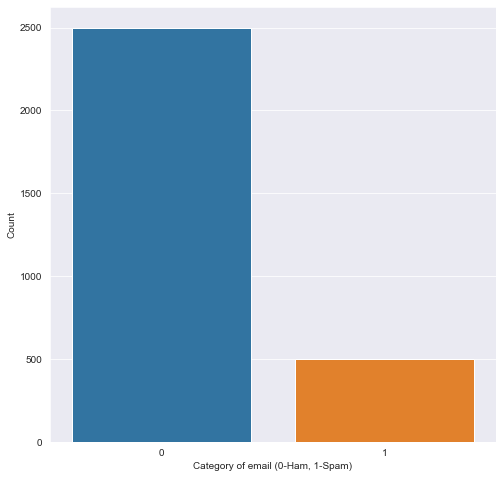

In [13]:
# Visualizing the count of 'Label' column from the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='class', data=data)
plt.xlabel('Category of email (0-Ham, 1-Spam)')
plt.ylabel('Count')
plt.show()

### NLP Preprocessing

In [14]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adiguru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df = data.copy()

In [16]:
# Removing punctuation and special character from the text
df['message'].replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [17]:
# Converting the entire text to lower case
df['message'] = df['message'].str.lower()

In [18]:
msg = df['message'].to_list()

In [19]:
# Creating corpus of dataset
ps = PorterStemmer()
corpus = []

for i in range(0, len(msg)):

    # Tokenizing the news-title by words
    words = msg[i].split()

    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # Stemming the words
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    msgs = ' '.join(words)

    # Building a corpus of news-title
    corpus.append(msgs)

In [20]:
# append corpus to dataframe
df['corpus'] = corpus

### Wordclouds for spam and ham emails

In [21]:
spam_words = []
for i in list(df[df['class']==1].index):
    spam_words.append(corpus[i])

ham_words = []
for i in list(df[df['class']==0].index):
    ham_words.append(corpus[i])

In [22]:
from wordcloud import WordCloud

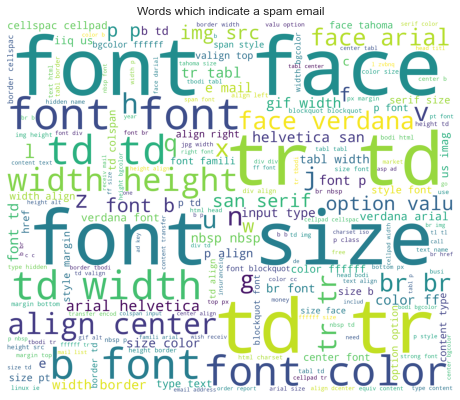

In [23]:
# Creating wordcloud for spam_words
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(x for x in spam_words))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a spam email")
plt.show()

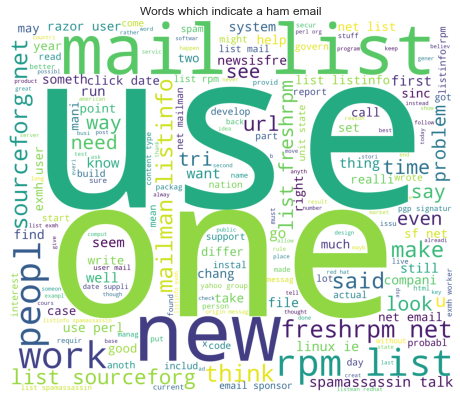

In [24]:
# Creating wordcloud for ham_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(x for x in ham_words))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a ham email")
plt.show()

### Vectorizing email data

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['corpus']).toarray()
y = df['class']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# splitting datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

### Machine learning models

#### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [29]:
lr_y_pred = lr_classifier.predict(X_test)

In [30]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 98.67%
Precision score is: 1.0
Recall score is: 0.89


In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [32]:
lr_cm

array([[131,   0],
       [  2,  17]], dtype=int64)

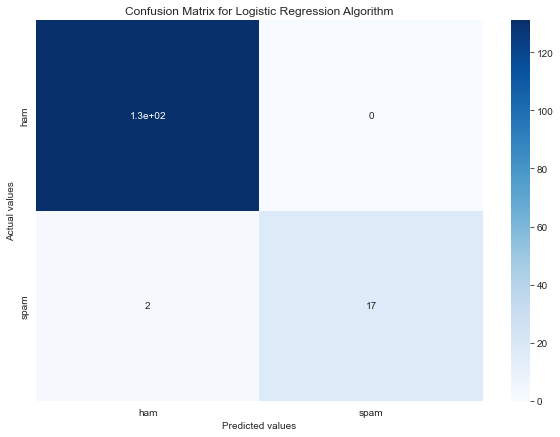

In [33]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

#### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [35]:
rf_y_pred = rf_classifier.predict(X_test)

In [36]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 98.0%
Precision score is: 0.94
Recall score is: 0.89


In [37]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [38]:
rf_cm

array([[130,   1],
       [  2,  17]], dtype=int64)

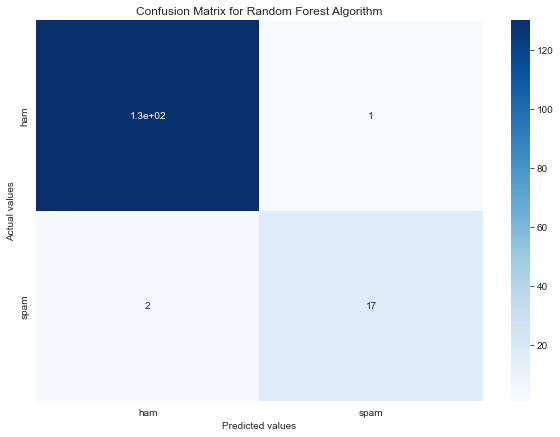

In [39]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

#### Multinomial Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [41]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [42]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 95.33%
Precision score is: 0.93
Recall score is: 0.68


In [43]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [44]:
nb_cm

array([[130,   1],
       [  6,  13]], dtype=int64)

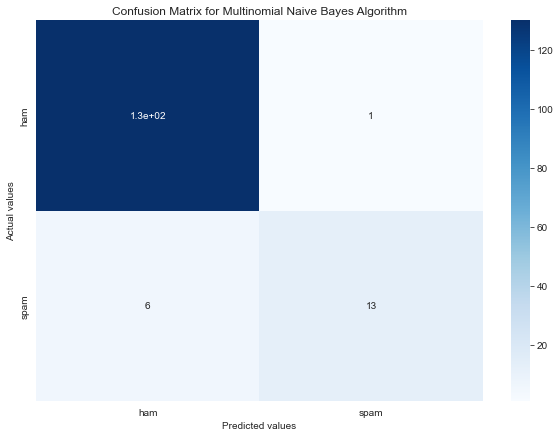

In [45]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()